In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import skimage.io, skimage.color
import numpy
import matplotlib.pyplot

def calculate_gradient(img, template):
    ts = template.size #Number of elements in the template (3).
    #New padded array to hold the resultant gradient image.
    
    
    new_img = numpy.zeros((img.shape[0]+ts-1, 
                           img.shape[1]+ts-1))
    
    new_img[numpy.uint16((ts-1)/2.0):img.shape[0]+numpy.uint16((ts-1)/2.0), 
            numpy.uint16((ts-1)/2.0):img.shape[1]+numpy.uint16((ts-1)/2.0)] = img
    result = numpy.zeros((new_img.shape))
    
    for r in numpy.uint16(numpy.arange((ts-1)/2.0, img.shape[0]+(ts-1)/2.0)):
        for c in numpy.uint16(numpy.arange((ts-1)/2.0, 
                              img.shape[1]+(ts-1)/2.0)):
            curr_region = new_img[r-numpy.uint16((ts-1)/2.0):r+numpy.uint16((ts-1)/2.0)+1, 
                                  c-numpy.uint16((ts-1)/2.0):c+numpy.uint16((ts-1)/2.0)+1]
            curr_result = curr_region * template
            score = numpy.sum(curr_result)
            result[r, c] = score
    #Result of the same size as the original image after removing the padding.
    result_img = result[numpy.uint16((ts-1)/2.0):result.shape[0]-numpy.uint16((ts-1)/2.0), 
                        numpy.uint16((ts-1)/2.0):result.shape[1]-numpy.uint16((ts-1)/2.0)]
    return result_img

def gradient_magnitude(horizontal_gradient, vertical_gradient):
    horizontal_gradient_square = numpy.power(horizontal_gradient, 2)
    vertical_gradient_square = numpy.power(vertical_gradient, 2)
    sum_squares = horizontal_gradient_square + vertical_gradient_square
    grad_magnitude = numpy.sqrt(sum_squares)
    return grad_magnitude

def gradient_direction(horizontal_gradient, vertical_gradient):
    grad_direction = numpy.arctan(vertical_gradient/(horizontal_gradient+0.00000001))
    grad_direction = numpy.rad2deg(grad_direction)
    grad_direction = grad_direction%180
    return grad_direction

def HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins):
    HOG_cell_hist = numpy.zeros(shape=(hist_bins.size))
    cell_size = cell_direction.shape[0]
    
    for row_idx in range(cell_size):
        for col_idx in range(cell_size):
            curr_direction = cell_direction[row_idx, col_idx]
            curr_magnitude = cell_magnitude[row_idx, col_idx]
    
            diff = numpy.abs(curr_direction - hist_bins)
            
            if curr_direction < hist_bins[0]:
                first_bin_idx = 0
                second_bin_idx = hist_bins.size-1
            elif curr_direction > hist_bins[-1]:
                first_bin_idx = hist_bins.size-1
                second_bin_idx = 0
            else:
                first_bin_idx = numpy.where(diff == numpy.min(diff))[0][0]
                temp = hist_bins[[(first_bin_idx-1)%hist_bins.size, (first_bin_idx+1)%hist_bins.size]]
                temp2 = numpy.abs(curr_direction - temp)
                res = numpy.where(temp2 == numpy.min(temp2))[0][0]
                if res == 0 and first_bin_idx != 0:
                    second_bin_idx = first_bin_idx-1
                else:
                    second_bin_idx = first_bin_idx+1
            
            first_bin_value = hist_bins[first_bin_idx]
            second_bin_value = hist_bins[second_bin_idx]
            HOG_cell_hist[first_bin_idx] = HOG_cell_hist[first_bin_idx] + (numpy.abs(curr_direction - first_bin_value)/(180.0/hist_bins.size)) * curr_magnitude
            HOG_cell_hist[second_bin_idx] = HOG_cell_hist[second_bin_idx] + (numpy.abs(curr_direction - second_bin_value)/(180.0/hist_bins.size)) * curr_magnitude
    return HOG_cell_hist

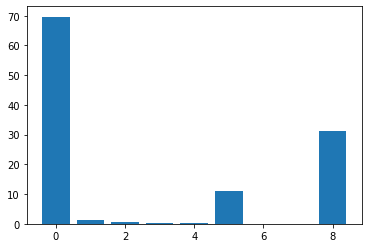

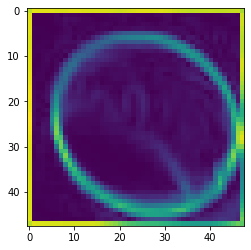

In [3]:
import skimage.io, skimage.color
import numpy
import matplotlib.pyplot

img = skimage.io.imread("positive.png")
img = skimage.color.rgb2gray(img)

horizontal_mask = numpy.array([-1, 0, 1])
vertical_mask = numpy.array([[-1],
                             [0],
                             [1]])

horizontal_gradient = calculate_gradient(img, horizontal_mask)
vertical_gradient = calculate_gradient(img, vertical_mask)

grad_magnitude = gradient_magnitude(horizontal_gradient, vertical_gradient)
grad_direction = gradient_direction(horizontal_gradient, vertical_gradient)

grad_direction = grad_direction % 180
hist_bins = numpy.array([10,30,50,70,90,110,130,150,170])

# Histogram of the first cell in the first block.
cell_direction = grad_direction[:8, :8]
cell_magnitude = grad_magnitude[:8, :8]
HOG_cell_hist  = HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins)

matplotlib.pyplot.bar(x=numpy.arange(9), height=HOG_cell_hist, align="center", width=0.8)
matplotlib.pyplot.show()
plt.imshow(grad_magnitude)

In [3]:
import skimage.io, skimage.color
import numpy
import matplotlib.pyplot
import cv2

#img = skimage.io.imread("positive.png")
img = cv2.imread("positive.png")


img = skimage.color.rgb2gray(img)

def HOG(img):
    
    horizontal_mask = numpy.array([-1, 0, 1])
    vertical_mask = numpy.array([[-1],
                                 [0],
                                 [1]])

    horizontal_gradient = calculate_gradient(img, horizontal_mask)
    vertical_gradient = calculate_gradient(img, vertical_mask)

    grad_magnitude = gradient_magnitude(horizontal_gradient, vertical_gradient)
    grad_direction = gradient_direction(horizontal_gradient, vertical_gradient)

    grad_direction = grad_direction % 180
    #hist_bins = numpy.array([10,30,50,70,90,110,130,150,170])

    # Histogram of the first cell in the first block.
    cell_direction = grad_direction.astype(int)
    cell_magnitude = grad_magnitude
    
    #result = numpy.concatenate((grad_direction.reshape(-1,H*W)[2:-2,2:-2],grad_magnitude.reshape(-1,H*W))[2:-2,2:-2], axis=1)
    
    return grad_magnitude[2:-2,2:-2]


#cell_direction = HOG(img)
#print(cell_direction)

#plt.imshow(cell_direction)

#HOG_cell_hist = HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins)

#matplotlib.pyplot.bar(x=numpy.arange(9), height=HOG_cell_hist, align="center", width=0.8)
#matplotlib.pyplot.show()

import skimage.io, skimage.color
import numpy
import matplotlib.pyplot
import cv2

#img = skimage.io.imread("positive.png")
img = cv2.imread("positive.png")

def HOG(img):
    
    horizontal_mask = numpy.array([-1, 0, 1])
    vertical_mask = numpy.array([[-1],
                                 [0],
                                 [1]])

    horizontal_gradient = calculate_gradient(img, horizontal_mask)
    vertical_gradient = calculate_gradient(img, vertical_mask)
    
    grad_direction = gradient_direction(horizontal_gradient, vertical_gradient)

    grad_direction = grad_direction % 180
    
    return grad_direction.astype(int)

img = skimage.color.rgb2gray(img)
cell_direction = HOG(img)

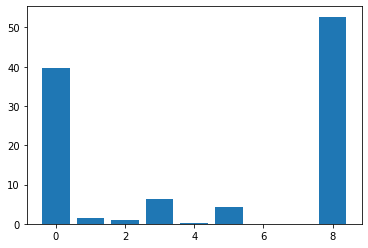

In [5]:
import skimage.io, skimage.color
import numpy
import matplotlib.pyplot

img = skimage.io.imread("negative.png")
img = skimage.color.rgb2gray(img)

horizontal_mask = numpy.array([-1, 0, 1])
vertical_mask = numpy.array([[-1],
                             [0],
                             [1]])

horizontal_gradient = calculate_gradient(img, horizontal_mask)
vertical_gradient = calculate_gradient(img, vertical_mask)

grad_magnitude = gradient_magnitude(horizontal_gradient, vertical_gradient)
grad_direction = gradient_direction(horizontal_gradient, vertical_gradient)

grad_direction = grad_direction % 180
hist_bins = numpy.array([10,30,50,70,90,110,130,150,170])

# Histogram of the first cell in the first block.
cell_direction = grad_direction[:8, :8]
cell_magnitude = grad_magnitude[:8, :8]
HOG_cell_hist = HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins)

matplotlib.pyplot.bar(x=numpy.arange(9), height=HOG_cell_hist, align="center", width=0.8)
matplotlib.pyplot.show()

In [4]:
import os
import numpy as np

negative_images = os.listdir('dataset/negative')
positive_images = os.listdir('dataset/positive')


dataset = None

y = []

for i,image in enumerate(negative_images):
    
    img = cv2.imread('dataset/negative/'+image)
    img = cv2.medianBlur(img, 21)
    img = skimage.color.rgb2gray(img)
    img = cv2.resize(img, (15,15), interpolation = cv2.INTER_AREA)

    cell_direction = HOG(img)
    
    if i == 0:
        print(cell_direction.shape)
        H,W = cell_direction.shape
        dataset = cell_direction.reshape(-1,H*W)
        
        y.append(0)
        
    else:
        new = cell_direction.reshape(-1,H*W)
        #numpy.concatenate((grad_direction.reshape(-1,H*W),grad_magnitude.reshape(-1,H*W)), axis=1)
        dataset = numpy.concatenate((dataset,new),axis=0)
        y.append(0)
    
    if i%10 == 0:
        print(i,dataset.shape)
        
for i,image in enumerate(positive_images):
    
    img = cv2.imread('dataset/positive/'+image)
    img = cv2.medianBlur(img, 21)
    img = skimage.color.rgb2gray(img)
    img = cv2.resize(img, (15,15), interpolation = cv2.INTER_AREA)
    
    cell_direction = HOG(img)
   
    #new = numpy.concatenate((grad_direction.reshape(-1,H*W),grad_magnitude.reshape(-1,H*W)), axis=1)
    new = cell_direction.reshape(-1,H*W)
    dataset = numpy.concatenate((dataset,new),axis=0)
    y.append(1)
    
    if i%10 == 0:
        print(i,dataset.shape)

y = np.array(y)

(11, 11)
0 (1, 121)
10 (11, 121)
20 (21, 121)
30 (31, 121)
40 (41, 121)
50 (51, 121)
60 (61, 121)
70 (71, 121)
80 (81, 121)
90 (91, 121)
100 (101, 121)
110 (111, 121)
120 (121, 121)
130 (131, 121)
140 (141, 121)
150 (151, 121)
160 (161, 121)
170 (171, 121)
180 (181, 121)
190 (191, 121)
200 (201, 121)
210 (211, 121)
220 (221, 121)
230 (231, 121)
240 (241, 121)
250 (251, 121)
260 (261, 121)
270 (271, 121)
280 (281, 121)
290 (291, 121)
300 (301, 121)
310 (311, 121)
320 (321, 121)
330 (331, 121)
340 (341, 121)
350 (351, 121)
360 (361, 121)
370 (371, 121)
380 (381, 121)
390 (391, 121)
400 (401, 121)
410 (411, 121)
420 (421, 121)
430 (431, 121)
440 (441, 121)
450 (451, 121)
460 (461, 121)
470 (471, 121)
480 (481, 121)
490 (491, 121)
500 (501, 121)
510 (511, 121)
520 (521, 121)
530 (531, 121)
540 (541, 121)
550 (551, 121)
560 (561, 121)
570 (571, 121)
580 (581, 121)
590 (591, 121)
600 (601, 121)
610 (611, 121)
620 (621, 121)
630 (631, 121)
640 (641, 121)
650 (651, 121)
660 (661, 121)
670 (671

In [24]:
len(negative_images)

1210

In [5]:
from sklearn import svm
import numpy as np
print('X: ',dataset.shape,' Y:',np.array(y).shape)

clf = svm.SVC(kernel = 'rbf',C = 77.9)
clf.fit(dataset, y)
pred = clf.predict(dataset)
print("Accuracy: ",1-abs((pred - np.array(y))).sum()/len(pred) )

X:  (2775, 121)  Y: (2775,)
Accuracy:  0.9981981981981982


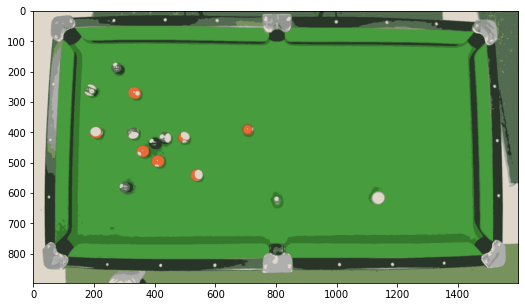

In [8]:
import numpy as np
import cv2 as cv
base = cv.imread('my_photo-9.jpg')[:,:,::-1]

def kmeans(img,seeds):
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = seeds
    ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    return res.reshape((img.shape))

plt.figure(figsize = (10,5))
plt.imshow(kmeans(base,10))

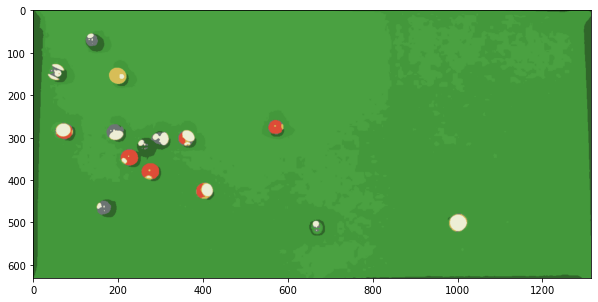

In [11]:
import numpy as np
import cv2 as cv
base = cv.imread('my_photo-9.jpg')[115:-150,135:-150,::-1]
base = kmeans(base,7)
base = cv2.medianBlur(base, 3)


plt.figure(figsize = (10,5))
plt.imshow(base)

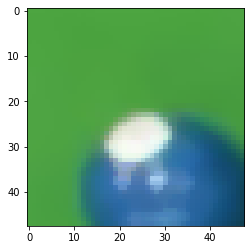

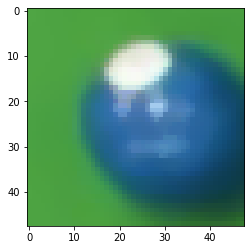

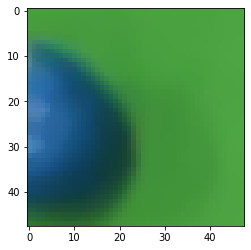

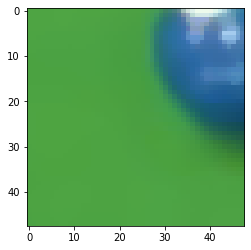

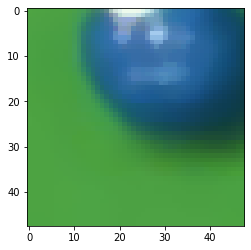

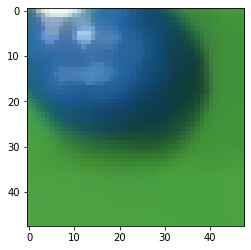

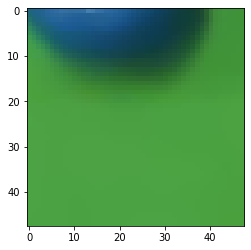

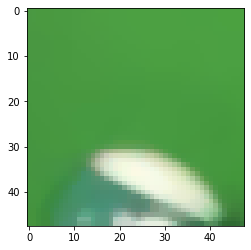

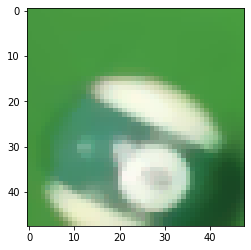

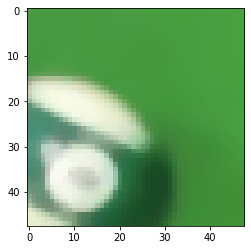

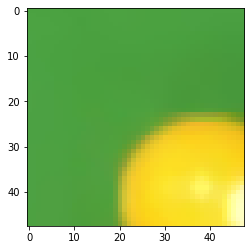

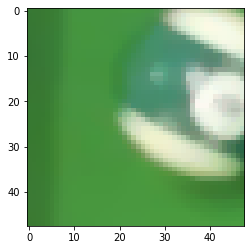

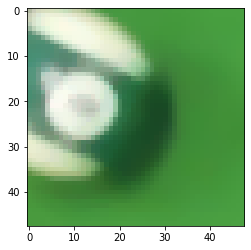

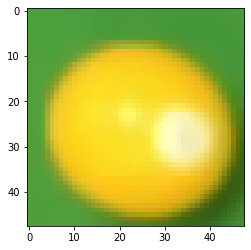

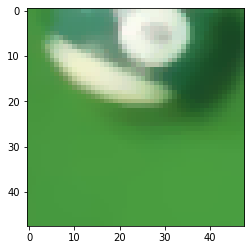

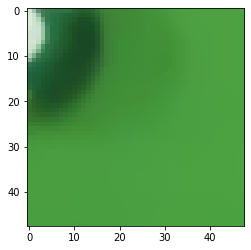

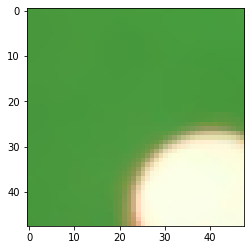

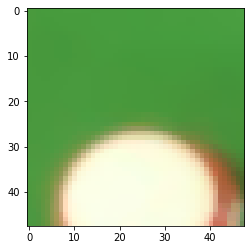

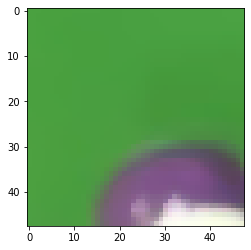

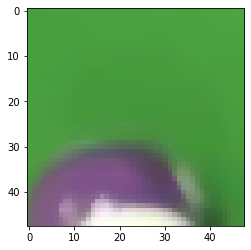

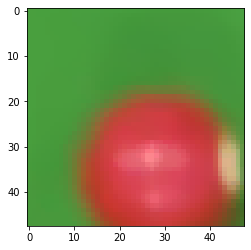

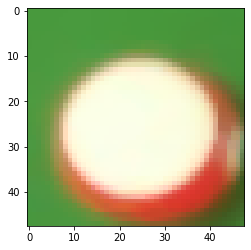

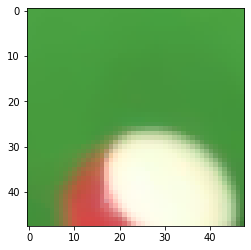

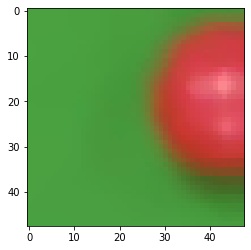

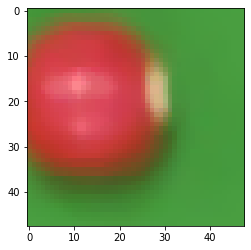

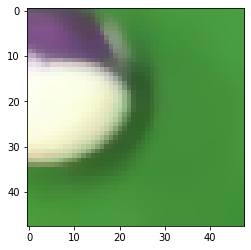

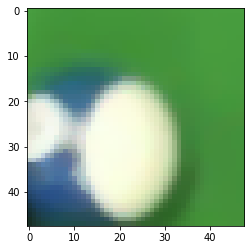

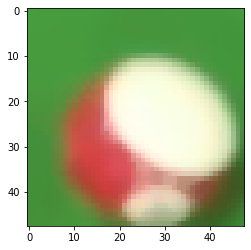

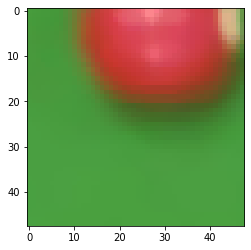

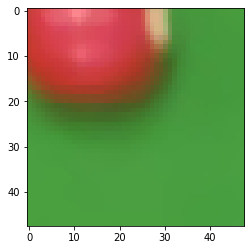

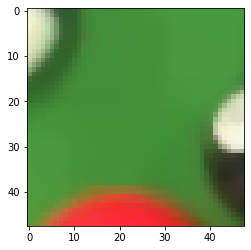

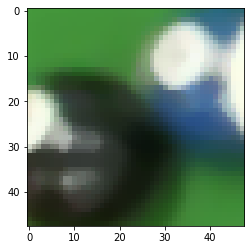

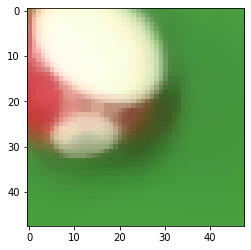

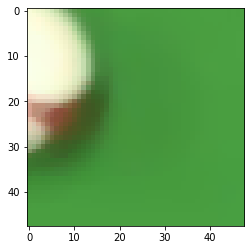

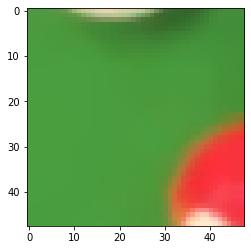

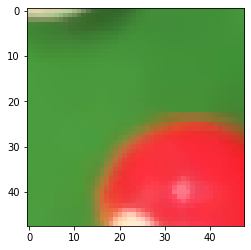

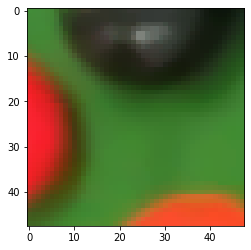

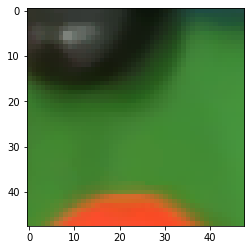

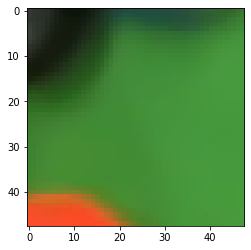

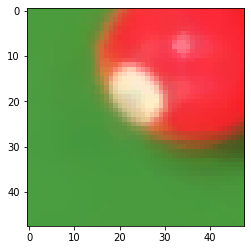

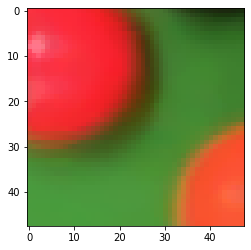

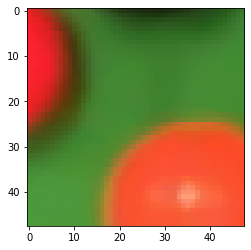

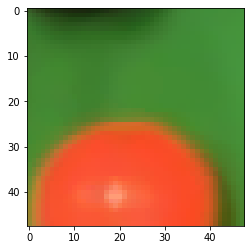

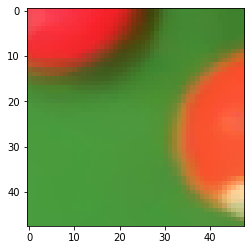

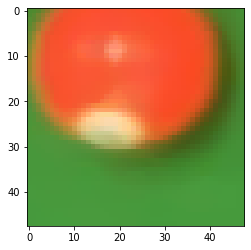

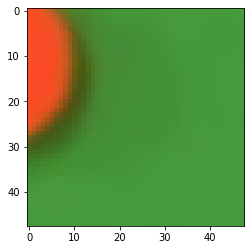

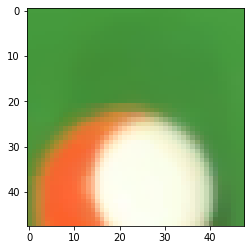

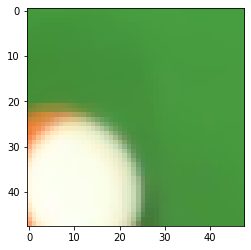

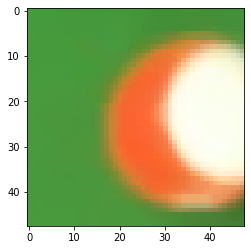

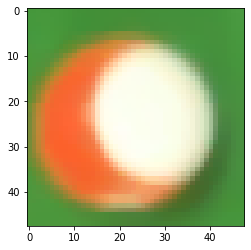

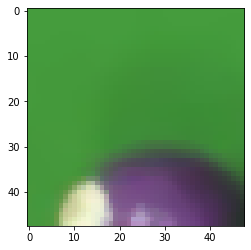

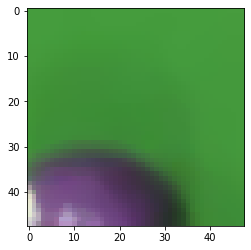

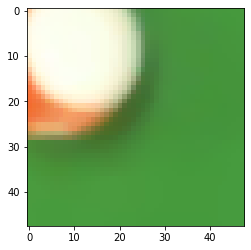

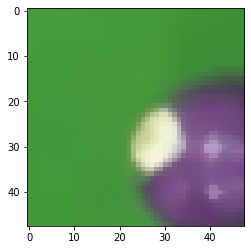

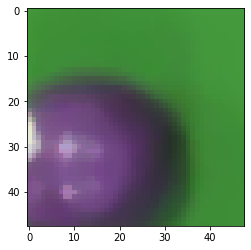

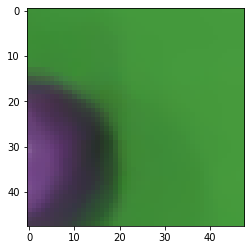

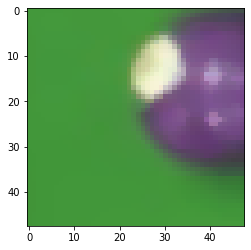

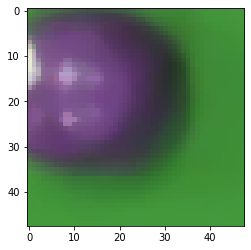

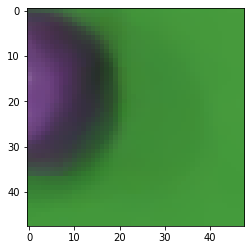

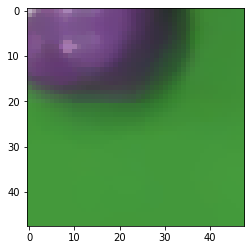

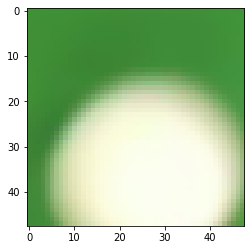

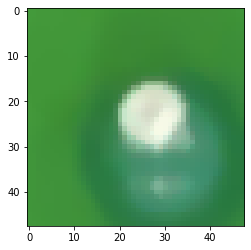

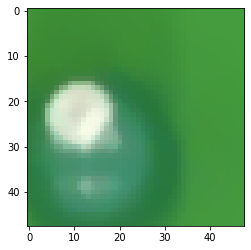

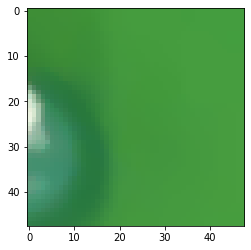

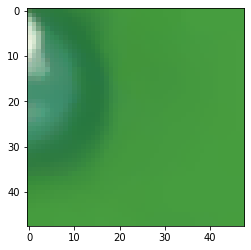

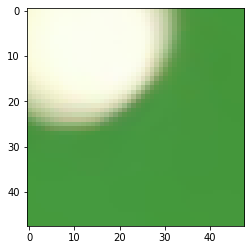

29.185829877853394


In [25]:
import numpy as np
import cv2 as cv
import time

base = cv.imread('my_photo-9.jpg')[115:-150,150:-165,::-1]
base = cv2.medianBlur(base, 5)


H,W,C         = base.shape
H_stride      = 16
W_stride      = 16

kernel_size   = 48
kernel_center = int(kernel_size/2)

start = time.time()
grey = skimage.color.rgb2gray(base)

show = base

start = time.time()

boxes = []

for h in range(int(kernel_size/2) , H - int(kernel_size/2),H_stride):
    for w in range(int(kernel_size/2) , W - int(kernel_size/2),W_stride):
        
        crop = grey[h-kernel_center:h+kernel_center,w-kernel_center:w+kernel_center]
        crop = cv2.resize(crop, (15,15), interpolation = cv2.INTER_AREA)
        cell_direction = HOG(crop)
        
        pred = clf.predict(cell_direction.reshape(-1,121))
        if pred == 1:

            cv2.imwrite('results/'+str(time.time()) +'.jpg',base[h-kernel_center:h+kernel_center,w-kernel_center:w+kernel_center:])
            plt.imshow(base[h-kernel_center:h+kernel_center,w-kernel_center:w+kernel_center,:])
            boxes.append([(w-kernel_center,h-kernel_center),(w+kernel_center,h+kernel_center)])
            plt.show()
    

    
print(time.time() - start)

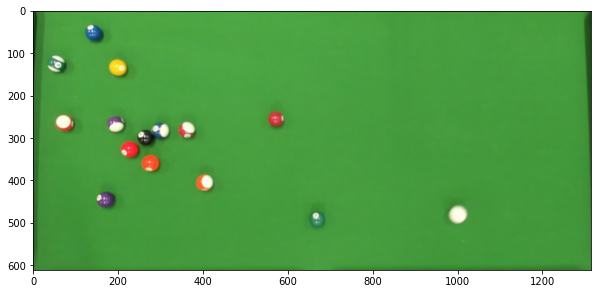

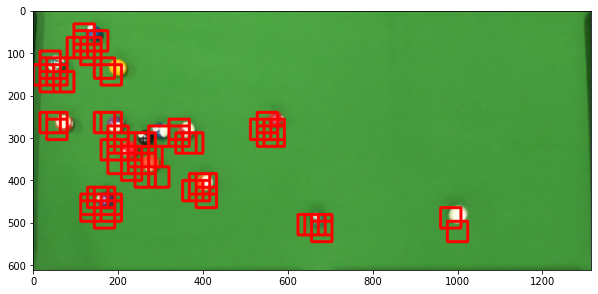

In [26]:
import cv2

show = cv2.imread('my_photo-9.jpg')[135:-150,135:-150,::-1].astype(np.uint8)

plt.figure(figsize = (10,5))
plt.imshow(show)

for box in boxes:
    show = cv2.rectangle(show, box[1], 
                                 box[0], (255,0,0), 6)
plt.figure(figsize = (10,5))
plt.imshow(show)

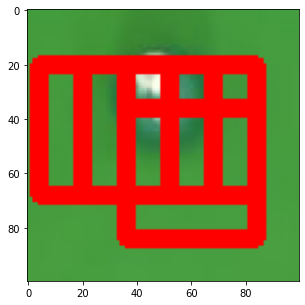

In [27]:
plt.figure(figsize = (10,5))
plt.imshow(show[460:560,620:720,:])

In [28]:
def NMS(boxes, overlapThresh = 0.4):
    # Return an empty list, if no boxes given
    if len(boxes) == 0:
        return []
    x1 = boxes[:, 0]  # x coordinate of the top-left corner
    y1 = boxes[:, 1]  # y coordinate of the top-left corner
    x2 = boxes[:, 2]  # x coordinate of the bottom-right corner
    y2 = boxes[:, 3]  # y coordinate of the bottom-right corner
    # Compute the area of the bounding boxes and sort the bounding
    # Boxes by the bottom-right y-coordinate of the bounding box
    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # We add 1, because the pixel at the start as well as at the end counts
    # The indices of all boxes at start. We will redundant indices one by one.
    indices = np.arange(len(x1))
    for i,box in enumerate(boxes):
        # Create temporary indices  
        temp_indices = indices[indices!=i]
        # Find out the coordinates of the intersection box
        xx1 = np.maximum(box[0], boxes[temp_indices,0])
        yy1 = np.maximum(box[1], boxes[temp_indices,1])
        xx2 = np.minimum(box[2], boxes[temp_indices,2])
        yy2 = np.minimum(box[3], boxes[temp_indices,3])
        # Find out the width and the height of the intersection box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / areas[temp_indices]
        # if the actual boungding box has an overlap bigger than treshold with any other box, remove it's index  
        if np.any(overlap) > overlapThresh:
            indices = indices[indices != i]
    #return only the boxes at the remaining indices
    return boxes[indices].astype(int)

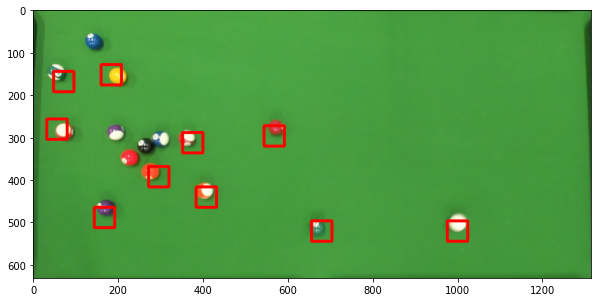

In [31]:
NMS_boxes  = NMS(np.array(boxes).reshape(-1,4), overlapThresh = 0.8)
show = cv2.imread('my_photo-9.jpg')[115:-150,135:-150,::-1].astype(np.uint8)

for box in NMS_boxes:
    show = cv2.rectangle(show,  box[2:], 
                                 box[0:2], (255,0,0), 6)
plt.figure(figsize = (10,5))
plt.imshow(show)

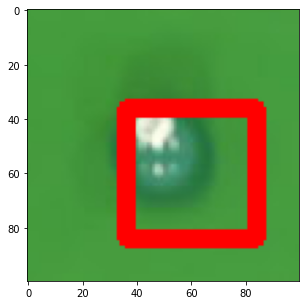

In [22]:
plt.figure(figsize = (10,5))
plt.imshow(show[460:560,620:720,:])